<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>FIFA19 - Player & Team Analysis and Value Predict</strong></p>


<img style="float: center;  border:5px solid #ffb037; width:100%" src = https://www.fifaultimateteam.it/en/wp-content/uploads/2018/08/DkkLl5DU4AMLOXy.jpg>


<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Introduction :-</strong></p>

### FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.

### Source: [Wikipedia](https://en.wikipedia.org/wiki/FIFA_19)


<p style = "font-size : 18px; color : #DC143C ; font-family : 'Comic Sans MS';  "><strong>Please upvote this kernel if you like it. It motivates me to produce more quality content :)</strong></p>


<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Imporing Libraries](#1.0)
* [Loading the data](#2.0)
    * [Eliminating the columns from analysis](#2.1)
* [Data Cleaning](#3.0) 
* [Exploratory Data Analysis (EDA)](#4.0) 
    * [Number of players for each categorical variables](#4.1)
    * [Distribution of age for each Players](#4.2)
    * [Distribution of Age By Potential and Overall Rating](#4.3)
    * [Top 20 teams with highest player's average value](#4.4)
    * [Top 20 teams with highest player's average Overall rating](#4.5)
    * [Top Features for every Playing Position](#4.6)
    * [Dream Team](#4.7)
    * [Dream Team in different Formation](#4.8)            
* [Feature Engineering](#5.0)
    * [Converting Categorical to Numerical columns](#5.1)
* [Feature Selection](#6.0)
* [Data Modeling](#7.0)
   


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p> 

In [1]:
### Data Analaysis
import numpy as np
import pandas as pd

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Loading the data</strong></p> 

In [2]:
pd.set_option('display.max_columns', None)
fifa = pd.read_csv(r'../input/fifa19/data.csv',index_col=0)

In [3]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

<a id = '2.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Eliminating the columns from analysis</strong></p> 

In [5]:
fifa.drop(['ID','Photo','Flag','Club Logo','Real Face','Jersey Number','Loaned From'],
          axis=1,inplace=True)

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p> 

In [6]:
#Numerical Features
fifa['International Reputation'].fillna(fifa['International Reputation'].mean(), inplace = True) 
fifa['Skill Moves'].fillna(fifa['Skill Moves'].mean(), inplace = True)
fifa['Weak Foot'].fillna(fifa['Weak Foot'].mean(), inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True) 
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'].mean(), inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['Acceleration'].fillna(fifa['Acceleration'].mean(), inplace = True)
fifa['SprintSpeed'].fillna(fifa['SprintSpeed'].mean(), inplace = True)
fifa['Agility'].fillna(fifa['Agility'].mean(), inplace = True)
fifa['Reactions'].fillna(fifa['Reactions'].mean(), inplace = True)
fifa['Balance'].fillna(fifa['Balance'].mean(), inplace = True)
fifa['ShotPower'].fillna(fifa['ShotPower'].mean(), inplace = True)
fifa['Jumping'].fillna(fifa['Jumping'].mean(), inplace = True)
fifa['Stamina'].fillna(fifa['Stamina'].mean(), inplace = True)
fifa['Strength'].fillna(fifa['Strength'].mean(), inplace = True)
fifa['LongShots'].fillna(fifa['LongShots'].mean(), inplace = True)
fifa['Aggression'].fillna(fifa['Aggression'].mean(), inplace = True)
fifa['Interceptions'].fillna(fifa['Interceptions'].mean(), inplace = True)
fifa['Positioning'].fillna(fifa['Positioning'].mean(), inplace = True)
fifa['Vision'].fillna(fifa['Vision'].mean(), inplace = True)
fifa['Penalties'].fillna(fifa['Penalties'].mean(), inplace = True)
fifa['Composure'].fillna(fifa['Composure'].mean(), inplace = True)
fifa['Marking'].fillna(fifa['Marking'].mean(), inplace = True)
fifa['StandingTackle'].fillna(fifa['StandingTackle'].mean(), inplace = True)
fifa['SlidingTackle'].fillna(fifa['SlidingTackle'].mean(), inplace = True)
fifa['GKDiving'].fillna(fifa['GKDiving'].mean(), inplace = True)
fifa['GKHandling'].fillna(fifa['GKHandling'].mean(), inplace = True)
fifa['GKKicking'].fillna(fifa['GKKicking'].mean(), inplace = True)
fifa['GKPositioning'].fillna(fifa['GKPositioning'].mean(), inplace = True)
fifa['GKReflexes'].fillna(fifa['GKReflexes'].mean(), inplace = True)

In [7]:
# Value, Wage and Release Clause Conversion
def value_and_wage_conversion(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)


fifa['Value'] = fifa['Value'].apply(lambda x: value_and_wage_conversion(x))
fifa['Wage'] = fifa['Wage'].apply(lambda x: value_and_wage_conversion(x))
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x: value_and_wage_conversion(x))
fifa['Release Clause'].fillna(fifa['Release Clause'].mean(), inplace = True)

In [8]:
#Categorical Columns
fifa['Club'].fillna('No Club', inplace = True)
fifa['Position'].fillna('unknown',inplace=True)

In [9]:
#Joined Column
def clean_date(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[-1]
    return(x)

fifa['Joined']=fifa['Joined'].replace(np.nan,0)
fifa['Joined'] = fifa['Joined'].apply(clean_date).astype('str')

In [10]:
#Contract Valid Until Column
import datetime
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['year'] = pd.DatetimeIndex(fifa['Contract Valid Until']).year.astype(str)
fifa['Contract Valid Until'].fillna('Not available', inplace = True) 

In [11]:
#Height Column
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


fifa['Height'] = fifa['Height'].apply(clean_height)
fifa['Height'].fillna((fifa['Height'].mean()), inplace = True)

In [12]:
#Weight Column
def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

fifa['Weight'] = fifa['Weight'].apply(clean_weight).astype('float')
fifa['Weight'].fillna((fifa['Weight'].mean()), inplace = True) 

In [13]:
#Work Rate Column
fifa['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [14]:
fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)

In [15]:
#Preferred Foot column
fifa['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [16]:
fifa['Preferred Foot'].fillna('Right', inplace = True)

In [17]:
#Body Type Column
fifa['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
C. Ronaldo                 1
Akinfenwa                  1
Messi                      1
Shaqiri                    1
Courtois                   1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Name: Body Type, dtype: int64

In [18]:
fifa['Body Type'][fifa['Body Type'] == 'Messi'] = 'Lean'
fifa['Body Type'][fifa['Body Type'] == 'C. Ronaldo'] = 'Normal'
fifa['Body Type'][fifa['Body Type'] == 'Neymar'] = 'Lean'
fifa['Body Type'][fifa['Body Type'] == 'Courtois'] = 'Lean'

#PLAYER_BODY_TYPE_25 is Normal body type
fifa['Body Type'][fifa['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
fifa['Body Type'][fifa['Body Type'] == 'Shaqiri'] = 'Stocky'
fifa['Body Type'][fifa['Body Type'] == 'Akinfenwa'] = 'Stocky'
fifa['Body Type'].fillna('Normal', inplace = True)

In [19]:
#Skill Columns

#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

for col in skill_columns:
    fifa[col] = fifa[col].apply(skillConverter)
    fifa[col].fillna(0.0, inplace = True)

In [20]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,year
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Lean,RF,2004,2021-01-01 00:00:00,5.583333,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2021.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,Normal,ST,2018,2022-01-01 00:00:00,6.166667,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2022.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Lean,LW,2017,2022-01-01 00:00:00,5.750000,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2022.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020-01-01 00:00:00,6.333333,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015,2023-01-01 00:00:00,5.916667,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2023.0


<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

<a id = '4.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong> Number of players for each categorical variables</strong></p>

In [21]:
def pie_count(data, field="Nationality", percent_limit=0.5, title="Number of players by "):
    
    title += field
    #data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]
    
    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"       
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace = go.Pie(labels = labels,
                values = datavals)

    layout = go.Layout(
        title = title,
        height=700
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()
    
pie_count(fifa, 'Nationality')
pie_count(fifa, 'Club')
pie_count(fifa, 'Preferred Foot')
pie_count(fifa, 'Work Rate', 0.1)
pie_count(fifa, 'Body Type', 0.1)
pie_count(fifa, 'Position', 0.1)

<a id = '4.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Distribution of age for each Players</strong></p>

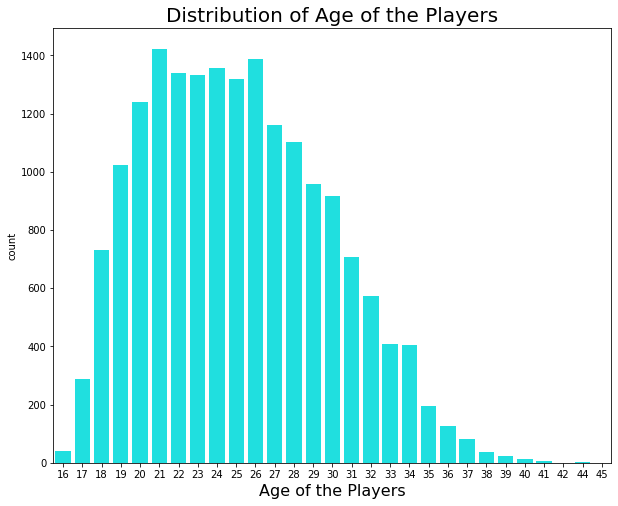

In [22]:
x = fifa['Age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

<a id = '4.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Distribution of Age By Potential and Overall Rating</strong></p>

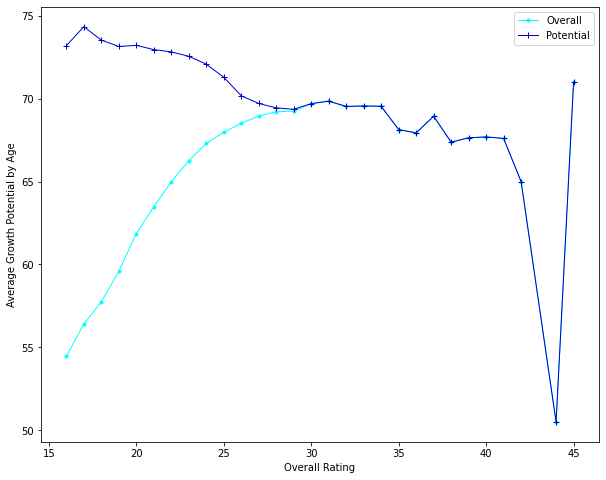

In [23]:
overall = pd.DataFrame(fifa.groupby(["Age"])['Overall'].mean())
potential = pd.DataFrame(fifa.groupby(["Age"])['Potential'].mean())

merged = pd.merge(overall, potential, on='Age', how='inner')
merged['Age']= merged.index

fig, ax = plt.subplots(figsize=(10,8))

merged.reset_index(drop = True, inplace = True)

plt.plot('Age', 'Overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('Age', 'Potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

<a id = '4.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Top 20 teams with highest player's average value</strong></p>

In [24]:
club = fifa.groupby('Club')['Value'].mean().reset_index().sort_values('Value', ascending=True).tail(20)
fig = px.bar(club, x="Value", y="Club", orientation='h')
fig.show()

<a id = '4.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Top 20 teams with highest player's average Overall rating</strong></p>

In [25]:
club = fifa.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)
fig = px.bar(club, x="Overall", y="Club", orientation='h')
fig.show()

<a id = '4.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Top Features for every Playing Position</strong></p>

In [26]:
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
df_postion  = pd.DataFrame()
for position_name, features in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion.head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,unknown
0,Balance,Strength,Stamina,Agility,Balance,GKReflexes,Agility,SprintSpeed,Strength,Stamina,Stamina,Balance,Acceleration,SprintSpeed,Acceleration,SprintSpeed,Agility,SprintSpeed,Strength,Stamina,Stamina,Agility,Acceleration,SprintSpeed,Acceleration,SprintSpeed,SprintSpeed,Acceleration
1,Agility,Jumping,Aggression,Balance,ShortPassing,GKDiving,Balance,Acceleration,Jumping,ShortPassing,ShortPassing,Agility,SprintSpeed,Strength,SprintSpeed,Acceleration,Balance,Stamina,Jumping,ShortPassing,ShortPassing,Acceleration,SprintSpeed,Strength,SprintSpeed,Acceleration,Strength,SprintSpeed
2,Acceleration,StandingTackle,Strength,Acceleration,Agility,GKPositioning,SprintSpeed,Stamina,StandingTackle,Balance,Strength,Acceleration,Agility,Acceleration,Agility,Stamina,Acceleration,Acceleration,Aggression,Agility,Aggression,Balance,Agility,Acceleration,Agility,Stamina,Acceleration,Balance
3,SprintSpeed,Aggression,ShortPassing,SprintSpeed,Stamina,GKHandling,Acceleration,Balance,Aggression,Agility,Aggression,Dribbling,Balance,ShotPower,Balance,Agility,SprintSpeed,Balance,StandingTackle,Balance,Strength,BallControl,Balance,Agility,Balance,Agility,Jumping,Jumping
4,BallControl,HeadingAccuracy,Jumping,Dribbling,Acceleration,GKKicking,Dribbling,Agility,HeadingAccuracy,BallControl,BallControl,BallControl,Dribbling,Positioning,Dribbling,Balance,Dribbling,Jumping,HeadingAccuracy,BallControl,Jumping,SprintSpeed,Dribbling,ShotPower,Dribbling,Balance,Finishing,Agility


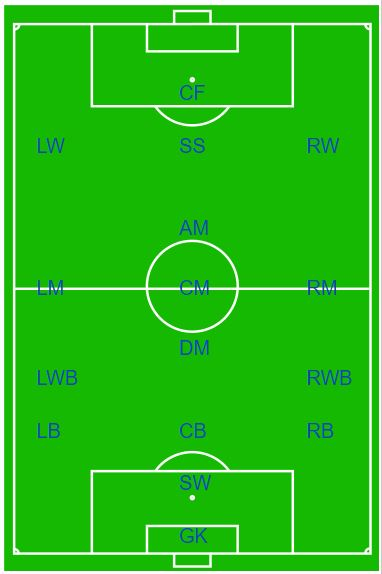

<a id = '4.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Dream Team</strong></p>

<img style="float: center;  border:5px solid #ffb037; width:60%" src = http://www.joyme.asia/assets/img/logo.png>

In [27]:
position = []
player = []
club_l = []
for col in df_postion.columns:
    tmp_df = pd.DataFrame()
    l = [df_postion[col].values]
    l = l[0]
    l = list(l)
    l.append('Name')
    tmp_df = pd.DataFrame.copy(fifa[fifa['Position'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
    name = tmp_df['Name'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
    club = fifa['Club'][fifa['Name'] == str(name)].values[0]
    position.append(col)
    player.append(name)
    club_l.append(club)
    
gk = ['GK']
forward = ['LS', 'ST', 'RS','LF', 'CF', 'RF']
midfeilder = ['LW','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
              'RCM', 'RM', 'LDM', 'CDM', 'RDM' ]
defenders = ['LWB','RWB', 'LB', 'LCB', 'CB',]

print('GoalKeeper : ')
for p , n , c in zip(position , player , club_l):
    if p in gk:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nFORWARD : ')
for p , n , c in zip(position , player , club_l):
    if p in forward:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nMIDFEILDER : ')
for p , n , c in zip(position , player , club_l):
    if p in midfeilder:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nDEFENDER : ')
for p , n , c in zip(position , player , club_l):
    if p in defenders:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))

GoalKeeper : 
De Gea [Club : Manchester United , Position : GK]

FORWARD : 
S. Giovinco [Club : Toronto FC , Position : CF]
E. Hazard [Club : Chelsea , Position : LF]
J. Martínez [Club : Atlanta United , Position : LS]
L. Messi [Club : FC Barcelona , Position : RF]
A. Saint-Maximin [Club : OGC Nice , Position : RS]
Cristiano Ronaldo [Club : Juventus , Position : ST]

MIDFEILDER : 
H. Nakagawa [Club : Kashiwa Reysol , Position : CAM]
Casemiro [Club : Real Madrid , Position : CDM]
N. Keïta [Club : Liverpool , Position : CM]
Paulo Daineiro [Club : Ceará Sporting Club , Position : LAM]
David Silva [Club : Manchester City , Position : LCM]
N. Kanté [Club : Chelsea , Position : LDM]
Douglas Costa [Club : Juventus , Position : LM]
Neymar Jr [Club : Paris Saint-Germain , Position : LW]
J. Cuadrado [Club : Juventus , Position : RAM]
L. Modrić [Club : Real Madrid , Position : RCM]
P. Pogba [Club : Manchester United , Position : RDM]
Gelson Martins [Club : Atlético Madrid , Position : RM]
R. Ster

In [28]:
CAM = 'H. Nakagawa'
CB = 'D. Godín'
CDM = 'Casemiro'
CF = 'S. Giovinco'
CM = 'N. Keïta'
GK = 'De Gea'
LAM = 'Paulo Daineiro'
LB = 'Jordi Alba'
LCB = 'G. Chiellini'
LCM = 'David Silva'
LDM = 'N. Kanté' 
LF = 'E. Hazard' 
LM = 'Douglas Costa' 
LS = 'J. Martínez' 
LW = 'Neymar Jr' 
LWB = 'M. Pedersen' 
RAM = 'J. Cuadrado' 
RB = 'Nélson Semedo' 
RCB = 'Sergio Ramos' 
RCM = 'L. Modrić' 
RDM = 'P. Pogba' 
RF = 'L. Messi' 
RM = 'Gelson Martins' 
RS = 'A. Saint-Maximin' 
RW = 'R. Sterling' 
RWB = 'M. Millar' 
ST = 'Cristiano Ronaldo' 

In [29]:
def create_football_formation(formation = [] , label_1 = None ,
                              label_2 = None , label_3 = None ,
                              label_4 = None,label_4W = None ,
                              label_5 = None , label_3W = None):
    
    plt.scatter(x = [1] , y = [6] , s = 300 , color = 'blue')
    plt.annotate('De Gea \n(Manchester United)' , (1 - 0.5 , 6 + 0.5))
    plt.plot(np.ones((11 , ))*1.5 , np.arange(1 , 12) , 'w-')
    plt.plot(np.ones((5 , ))*0.5 , np.arange(4 , 9) , 'w-')
    
    n = 0
    for posi in formation:
        if posi ==  1:
            n += 3
            dot = plt.scatter(x = [n]  , y = [6] , s = 400 , color = 'white')
            plt.scatter(x = [n]  , y = [6] , s = 300 , color = 'red')
            for i, txt in enumerate(label_1):
                txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                plt.annotate(txt, ( n-0.5 , 6+0.5))
            
        elif posi == 2:
            n += 3
            y = [5 , 7.5]
            x = [ n , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_2):
                txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')') 
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
        elif posi == 3:
            n+=3
            y = [3.333 , 6.666 , 9.999]
            x = [n , n  , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_3):
                txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
            if not label_3W == None:
                n+=3
                y = [3.333 , 6.666 , 9.999]
                x = [n , n  , n ]
                plt.scatter(x  , y , s = 400 , color = 'white')
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_3W):
                    txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
        elif posi == 4 and not label_4 == None:
            n+=3
            y = [2.5 , 5 , 7.5 , 10]
            x = [n , n  , n , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_4):
                txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
                
            if not label_4W == None:
                n+=3
                y = [2.5 , 5 , 7.5 , 10]
                x = [n , n  , n , n ]
                plt.scatter(x  , y , s = 400 , color = 'white')
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_4W):
                    txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
                
                
        elif posi == 5:
            n+=3
            y = [2 , 4 , 6 , 8 , 10]
            x = [n , n , n  , n  , n]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_5):
                txt = str(txt+'\n('+fifa['Club'][fifa['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
    plt.plot(np.ones((5 , ))*(n+0.5) , np.arange(4 , 9) , 'w-')
    plt.plot(np.ones((11 , ))*(n/2) , np.arange(1 , 12) , 'w-')
    plt.yticks([])
    plt.xticks([])
    ax = plt.gca()
    ax.set_facecolor('#28fc03')            

<a id = '4.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Dream Team in different Formation</strong></p>

<img style="float: center;  border:5px solid #ffb037; width:80%" src = https://fifauteam.com/wp-content/uploads/2018/08/A1639-7.jpg>

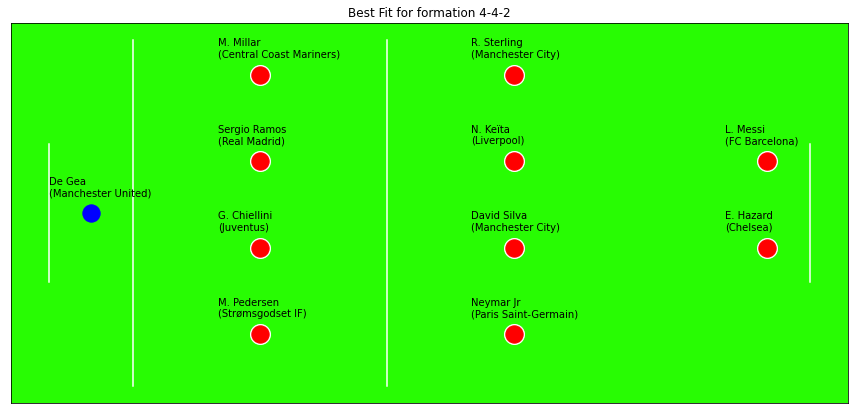

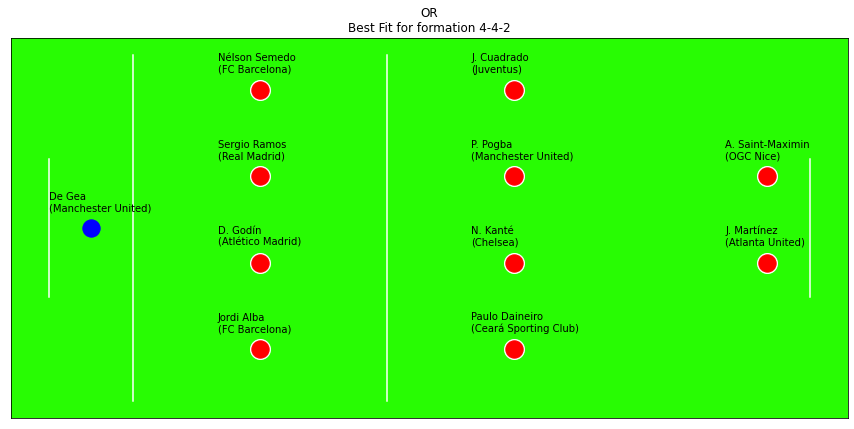

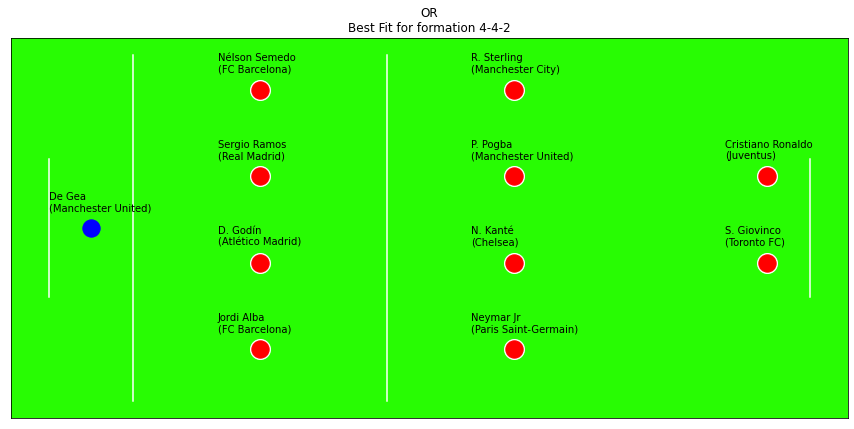

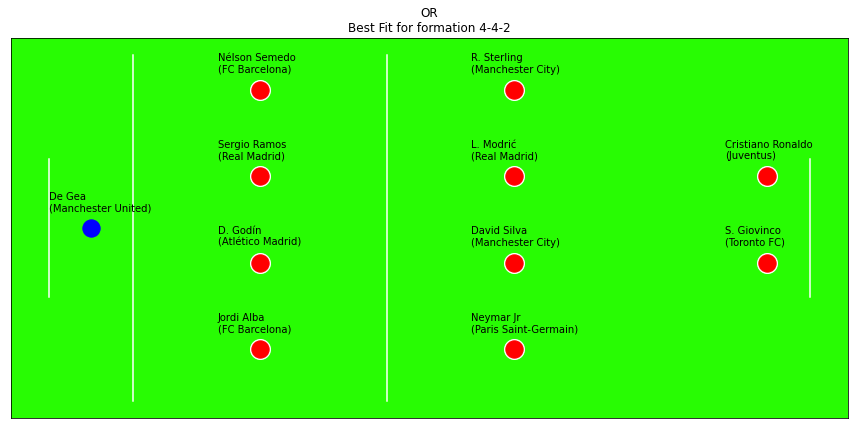

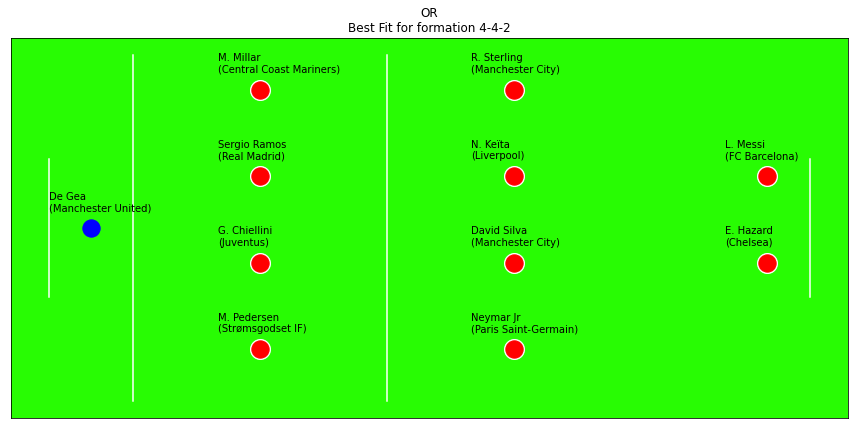

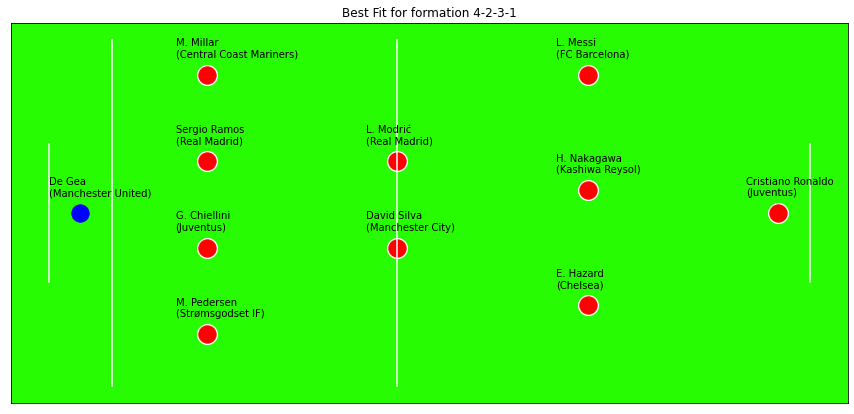

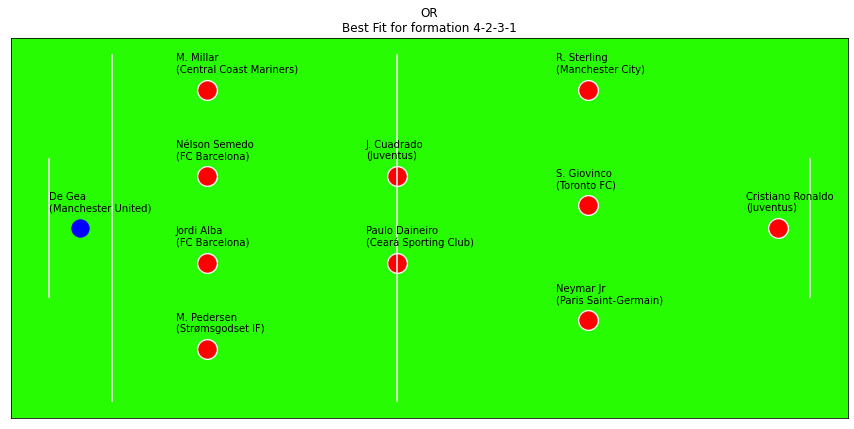

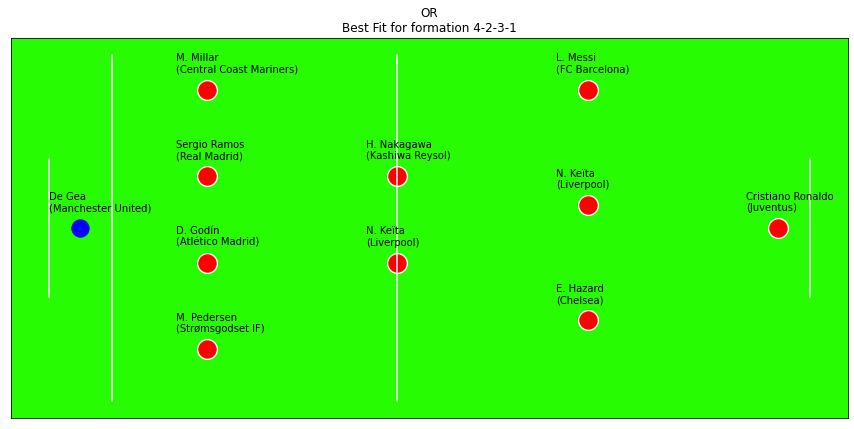

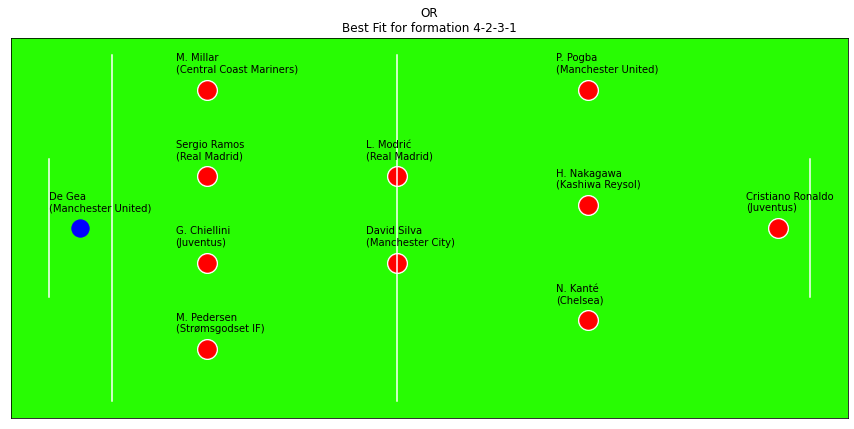

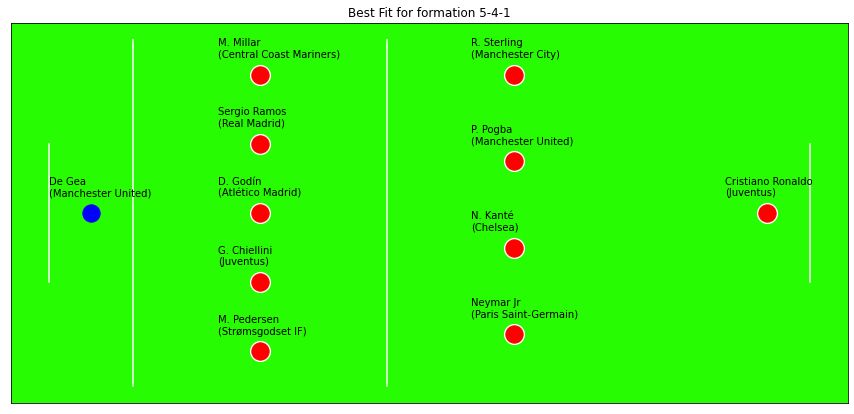

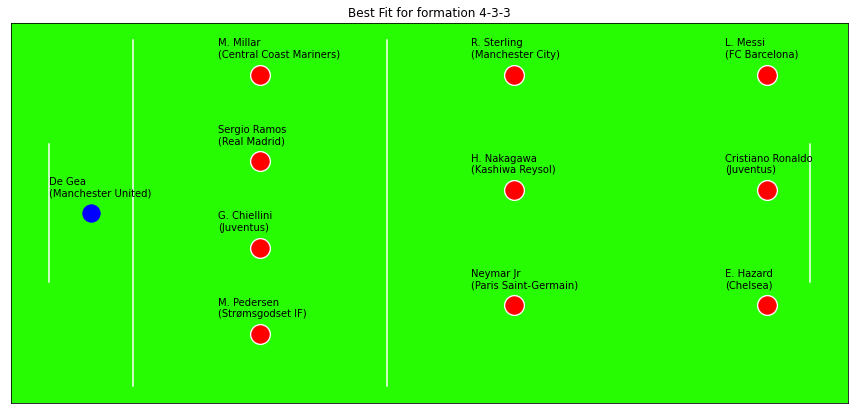

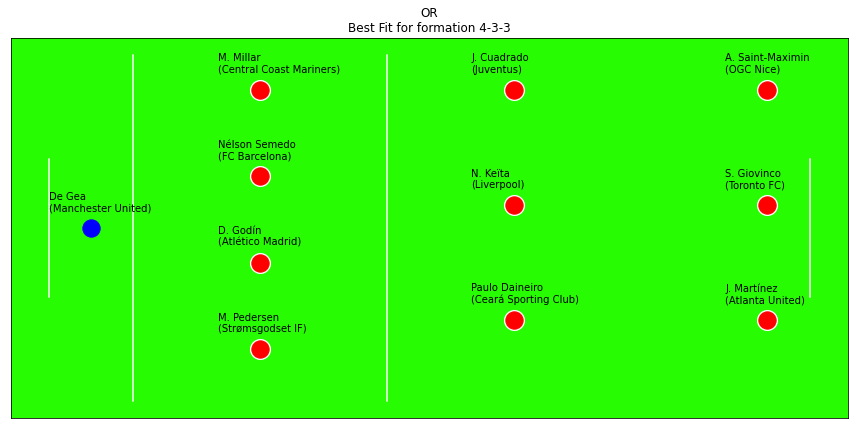

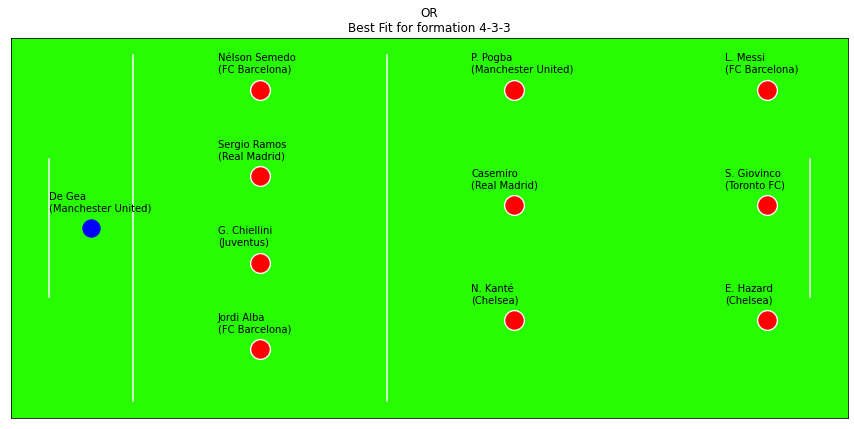

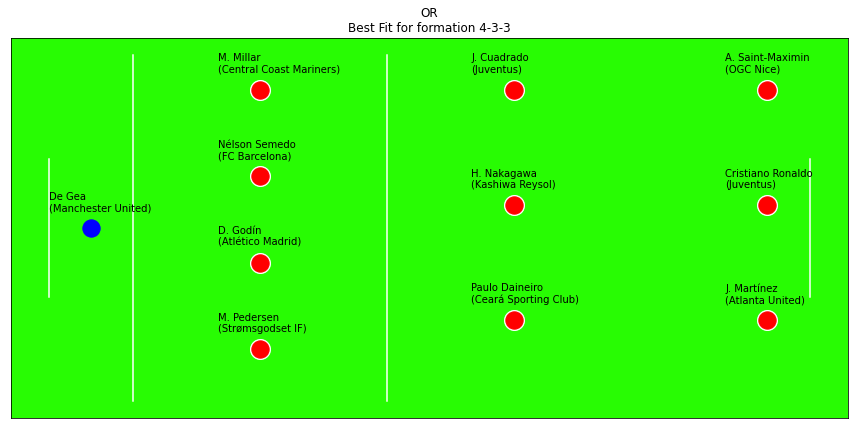

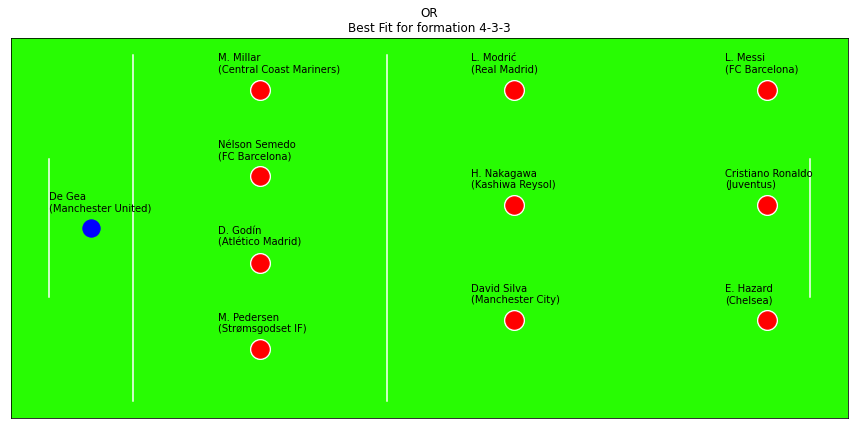

In [30]:
plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 ] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_4W = [LW , LCM , CM , RW],
                         label_2 = [LF , RF],
                         )
plt.title('Best Fit for formation 4-4-2')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 ] , 
                         label_4 = [LB , CB , RCB , RB],
                         label_4W = [LAM , LDM , RDM , RAM],
                         label_2 = [LS , RS],
                         )
plt.title('OR\nBest Fit for formation 4-4-2')
plt.show()


plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 ] , 
                         label_4 = [LB , CB , RCB , RB],
                         label_4W = [LW , LDM , RDM , RW],
                         label_2 = [CF , ST],
                         )
plt.title('OR\nBest Fit for formation 4-4-2')
plt.show()


plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 ] , 
                         label_4 = [LB , CB , RCB , RB],
                         label_4W = [LW , LCM , RCM , RW],
                         label_2 = [CF , ST],
                         )
plt.title('OR\nBest Fit for formation 4-4-2')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 ] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_4W = [LW , LCM , CM , RW],
                         label_2 = [LF , RF],
                         )
plt.title('OR\nBest Fit for formation 4-4-2')
plt.show()


plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 , 3 , 1] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_2 = [LCM , RCM],
                         label_3 = [LF , CAM , RF],
                         label_1 = [ST])
plt.title('Best Fit for formation 4-2-3-1')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 , 3 , 1] , 
                         label_4 = [LWB , LB , RB , RWB],
                         label_2 = [LAM , RAM],
                         label_3 = [LW , CF , RW],
                         label_1 = [ST])
plt.title('OR\nBest Fit for formation 4-2-3-1')
plt.show()

plt.figure(1 , figsize = (15 , 7))
create_football_formation(formation = [ 4 , 2 , 3 , 1] , 
                         label_4 = [LWB , CB , RCB , RWB],
                         label_2 = [CM , CAM],
                         label_3 = [LF , CM , RF],
                         label_1 = [ST])
plt.title('OR\nBest Fit for formation 4-2-3-1')

plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 2 , 3 , 1] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_2 = [LCM , RCM],
                         label_3 = [LDM , CAM , RDM],
                         label_1 = [ST])
plt.title('OR\nBest Fit for formation 4-2-3-1')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 5, 4 , 1 ] , 
                         label_5 = [LWB , LCB , CB , RCB , RWB],
                         label_4 = [LW, LDM , RDM , RW],
                         label_1 = [ST])
plt.title('Best Fit for formation 5-4-1')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 3 ] , 
                         label_4 = [LWB , LCB , RCB , RWB],
                         label_3 = [LW, CAM , RW],
                         label_3W = [LF , ST , RF])
plt.title('Best Fit for formation 4-3-3')
plt.show()


plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 3 ] , 
                         label_4 = [LWB , CB , RB , RWB],
                         label_3 = [LAM, CM , RAM],
                         label_3W = [LS , CF , RS])
plt.title('OR\nBest Fit for formation 4-3-3')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 3 ] , 
                         label_4 = [LB , LCB , RCB , RB],
                         label_3 = [LDM, CDM , RDM],
                         label_3W = [LF , CF , RF])
plt.title('OR\nBest Fit for formation 4-3-3')
plt.show()

plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 3] , 
                         label_4 = [LWB , CB , RB , RWB],
                         label_3 = [LAM, CAM , RAM],
                         label_3W = [LS , ST , RS])
plt.title('OR\nBest Fit for formation 4-3-3')
plt.show()


plt.figure(1 , figsize = (15 , 7))           
create_football_formation(formation = [ 4 , 3] , 
                         label_4 = [LWB , CB , RB , RWB],
                         label_3 = [LCM, CAM , RCM],
                         label_3W = [LF , ST , RF])
plt.title('OR\nBest Fit for formation 4-3-3')
plt.show()



<a id = '5.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Engineering</strong></p> 

In [31]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (Major Playing Nations)
nat_counts = fifa["Nationality"].value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df["Nationality"] in nat_list):
        return 1
    else:
        return 0
    
fifa['Major_Nation'] = fifa.apply(major_nation,axis = 1)

In [32]:
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
fifa['Right_Foot'] = fifa.apply(right_footed, axis=1)

In [33]:
#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position
    
fifa['Simple_Position'] = fifa.apply(simple_position,axis = 1)

In [34]:
#Split the Work Rate Column in two
tempwork = fifa["Work Rate"].str.split("/ ", n = 1, expand = True) 

#Create new column for first work rate
fifa["WorkRate1"]= tempwork[0]   

#Create new column for second work rate
fifa["WorkRate2"]= tempwork[1]

In [35]:
# Drop Columns
fifa.drop(['Name','Nationality','Club','Wage','Preferred Foot','Work Rate','Position','Joined',
          'Contract Valid Until','Release Clause','year'],axis=1,inplace=True)

In [36]:
fifa.head()

,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,Body Type,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Major_Nation,Right_Foot,Simple_Position,WorkRate1,WorkRate2
0,31,94,94,110500000.0,2202,5.0,4.0,4.0,Lean,5.583333,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,ST,Medium,Medium
1,33,94,94,77000000.0,2228,5.0,4.0,5.0,Normal,6.166667,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,ST,High,Low
2,26,92,93,118500000.0,2143,5.0,5.0,5.0,Lean,5.750000,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,AM,High,Medium
3,27,91,93,72000000.0,1471,4.0,3.0,1.0,Lean,6.333333,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,GK,Medium,Medium
4,27,91,92,102000000.0,2281,4.0,5.0,4.0,Normal,5.916667,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,MF,High,High


<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Converting Categorical to Numerical columns</strong></p>

In [37]:
fifa['Body Type'].unique()

array(['Lean', 'Normal', 'Stocky'], dtype=object)

In [38]:
body_type= {
    'Lean':0,
           'Normal':1,
           'Stocky':2
}
fifa['Body Type'] = fifa['Body Type'].map(body_type)

In [39]:
fifa['Simple_Position'].unique()

array(['ST', 'AM', 'GK', 'MF', 'DF', 'DM', 'unknown'], dtype=object)

In [40]:
simple_position = {
    'ST':0,
    'AM':1,
    'GK':2,
    'MF':3,
    'DF':4,
    'DM':5,
    'unknown':6
}
fifa['Simple_Position'] = fifa['Simple_Position'].map(simple_position)

In [41]:
fifa['WorkRate1'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [42]:
fifa['WorkRate2'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [43]:
work_rate ={
    'Medium':0,
    'High':1,
    'Low':2
}
fifa['WorkRate1'] = fifa['WorkRate1'].map(work_rate)
fifa['WorkRate2'] = fifa['WorkRate2'].map(work_rate)

In [44]:
#dropping the converted columns
fifa.drop(['Body Type','Simple_Position', 'WorkRate1','WorkRate2'],axis=1, inplace=True)

In [45]:
fifa.head()

,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Major_Nation,Right_Foot
0,31,94,94,110500000.0,2202,5.0,4.0,4.0,5.583333,159.0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0
1,33,94,94,77000000.0,2228,5.0,4.0,5.0,6.166667,183.0,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1
2,26,92,93,118500000.0,2143,5.0,5.0,5.0,5.750000,150.0,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1
3,27,91,93,72000000.0,1471,4.0,3.0,1.0,6.333333,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1
4,27,91,92,102000000.0,2281,4.0,5.0,4.0,5.916667,154.0,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1


In [46]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Major_Nation',
       'Right_Foot'],
      dtype='object')

In [47]:
X = fifa[['Age','Overall', 'Potential','Special','International Reputation', 'Weak Foot', 
          'Skill Moves', 'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 
          'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
          'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
          'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
          'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
          'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
          'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
          'Major_Nation', 'Right_Foot']]
y = np.log1p(fifa['Value'])

<AxesSubplot:xlabel='Value'>

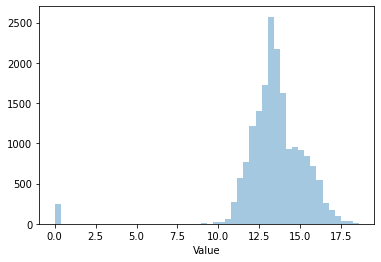

In [48]:
sns.distplot(y,kde=False)

In [49]:
y_index = y[y>7].index
X = X.loc[y_index]
y = y[y>7]
print(X.shape, y.shape)

(17955, 45) (17955,)


In [50]:
X.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Major_Nation,Right_Foot
0,31,94,94,2202,5.0,4.0,4.0,5.583333,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0
1,33,94,94,2228,5.0,4.0,5.0,6.166667,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1
2,26,92,93,2143,5.0,5.0,5.0,5.750000,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1
3,27,91,93,1471,4.0,3.0,1.0,6.333333,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1
4,27,91,92,2281,4.0,5.0,4.0,5.916667,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1


In [51]:
X.shape

(17955, 45)

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Selection</strong></p> 


In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

sel_ = SelectFromModel(Lasso(alpha=.0001, random_state=42)) 
sel_.fit(X_norm, y)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=42))

In [53]:
sel_.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True])

In [54]:
selected_feat = X.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 45
selected features: 35
features with coefficients shrank to zero: 10


In [55]:
selected_feat

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys',
       'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'Major_Nation', 'Right_Foot'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Modeling</strong></p> 


In [56]:
X_model = X[selected_feat]
X_model.shape

(17955, 35)

In [57]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.3, random_state=42)

In [58]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12568, 35) (5387, 35) (12568,) (5387,)


In [59]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

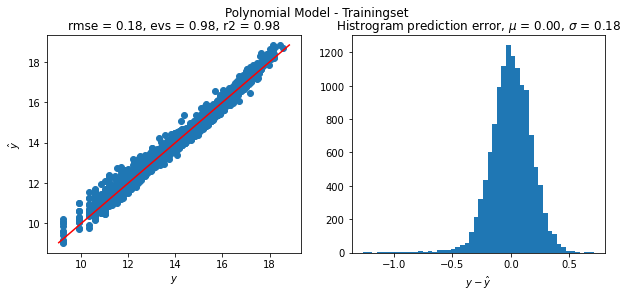

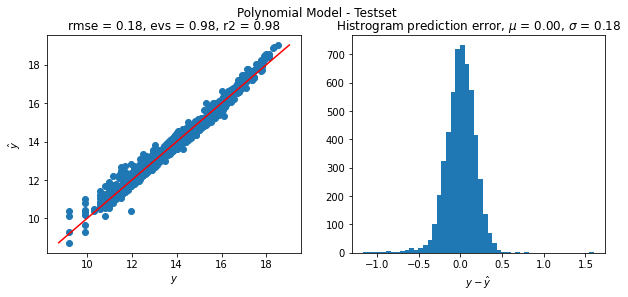

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#model = LinearRegression()
model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Lasso(alpha=0.01))
    ))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Polynomial Model - Trainingset')

y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')